# пип инстолы

In [1]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 13.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [2]:
!which python

/usr/local/bin/python


In [3]:
!pip install statsmodels

In [4]:
!python --version

Python 3.10.12


In [2]:
import statsmodels
import os, sys
from argparse import Namespace
import numpy as np
import pandas as pd
from pathlib import Path
from collections import OrderedDict
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import sklearn
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
#import wandb

plt.style.use('tableau-colorblind10')

In [3]:
print('Python version:', sys.version)
print('Package versions:')
print('Pytorch:', torch.__version__)
print('Pytorch-Lightning:', pl.__version__)
print('Matplotlib:', matplotlib.__version__)
print('scikit-learn:', sklearn.__version__)
#print('Weights&Biases:', wandb.__version__)

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Package versions:
Pytorch: 2.2.1+cu121
Pytorch-Lightning: 2.2.2
Matplotlib: 3.7.1
scikit-learn: 1.2.2


# Загрузка датасета

In [10]:
datafile_path = Path('/content/angle_changing.csv')
datasets_root = Path('/content')

In [11]:
raw_dt = pd.read_csv(datafile_path)
raw_dt.head(20)

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео
0,0,1.183072,960,540,25.0,h264,2.792969,2024-04-12 22:38:23
1,1,0.058239,960,540,25.0,h264,18225.000000,2024-04-12 22:38:23
2,2,0.068052,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23
3,3,0.045046,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23
4,4,0.042582,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23
5,5,0.085793,960,540,25.0,h264,3037.500000,2024-04-12 22:38:23
6,6,0.074974,960,540,25.0,h264,3037.500000,2024-04-12 22:38:23
7,7,0.093518,960,540,25.0,h264,3037.500000,2024-04-12 22:38:23
8,8,0.061496,960,540,25.0,h264,3037.500000,2024-04-12 22:38:23
9,9,0.058989,960,540,25.0,h264,1518.750000,2024-04-12 22:38:24


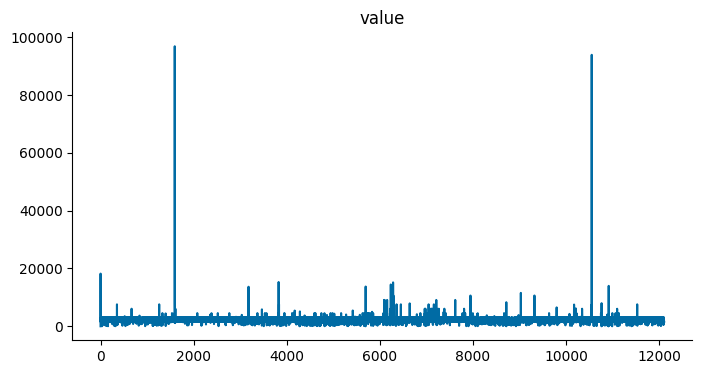

In [13]:
# @title value

from matplotlib import pyplot as plt
raw_dt['Битрейт (КБ/сек)'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
raw_dt.describe()

,Шаг,Время,Ширина,Высота,Частота кадров,Битрейт (КБ/сек)
count,12106.000000,12106.000000,12106.0,12106.0,12106.0,12106.000000
mean,6052.500000,0.058665,960.0,540.0,25.0,2224.932507
std,3494.845514,0.040453,0.0,0.0,0.0,1532.566354
min,0.000000,0.040000,960.0,540.0,25.0,0.047852
25%,3026.250000,0.041878,960.0,540.0,25.0,1518.750000
50%,6052.500000,0.048332,960.0,540.0,25.0,1857.210938
75%,9078.750000,0.074808,960.0,540.0,25.0,3037.500000
max,12105.000000,2.715247,960.0,540.0,25.0,96918.915039


In [16]:
data = raw_dt

In [19]:
data.head()

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео
0,0,1.183072,960,540,25.0,h264,2.792969,2024-04-12 22:38:23
1,1,0.058239,960,540,25.0,h264,18225.000000,2024-04-12 22:38:23
2,2,0.068052,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23
3,3,0.045046,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23
4,4,0.042582,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23


In [17]:
data['Время видео'].min(), data['Время видео'].max()

('2024-04-12 22:38:23', '2024-04-12 22:50:12')

In [18]:
data['day'] = data['Время видео'].dt.day
data['month'] = data['Время видео'].dt.month
data['hour_min'] = data['Время видео'].dt.hour + data['Время видео'].dt.minute / 60

AttributeError: Can only use .dt accessor with datetimelike values

In [20]:
# Convert 'Время видео' column to datetime
data['Время видео'] = pd.to_datetime(data['Время видео'])

# Now you can use the .dt accessor
data['day'] = data['Время видео'].dt.day
data['month'] = data['Время видео'].dt.month
data['hour_min'] = data['Время видео'].dt.hour + data['Время видео'].dt.minute / 60


In [22]:
data = data.drop(columns=['holiday'])

In [23]:
data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.183072,960,540,25.0,h264,2.792969,2024-04-12 22:38:23,12,4,22.633333
1,1,0.058239,960,540,25.0,h264,18225.000000,2024-04-12 22:38:23,12,4,22.633333
2,2,0.068052,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
3,3,0.045046,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
4,4,0.042582,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
...,...,...,...,...,...,...,...,...,...,...,...
12101,12101,0.070591,960,540,25.0,h264,3037.500000,2024-04-12 22:50:12,12,4,22.833333
12102,12102,0.041576,960,540,25.0,h264,1518.750000,2024-04-12 22:50:12,12,4,22.833333
12103,12103,0.060667,960,540,25.0,h264,1519.964844,2024-04-12 22:50:12,12,4,22.833333
12104,12104,0.044035,960,540,25.0,h264,1518.750000,2024-04-12 22:50:12,12,4,22.833333


In [ ]:
from datetime import datetime

# Преобразование времени в формат datetime
dt_object = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')

# Получение количества секунд с начала суток
seconds_since_midnight = (dt_object - dt_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()

print(seconds_since_midnight)

58336.59043


In [ ]:
# Преобразование строки времени в количество секунд с начала суток
data['t'] = data['timestamp'].dt.hour * 3600 + data['timestamp'].dt.minute * 60 + data['timestamp'].dt.second + data['timestamp'].dt.microsecond / 1e6

data.head(20)

,timestamp,value,day,month,hour_min,day_of_week,holiday,t
0,2024-04-07 16:12:16.590430,313.803731,7,4,16.2,6,0,58336.59043
1,2024-04-07 16:12:17.590430,325.837894,7,4,16.2,6,0,58337.59043
2,2024-04-07 16:12:18.590430,341.648436,7,4,16.2,6,0,58338.59043
3,2024-04-07 16:12:19.590430,344.685966,7,4,16.2,6,0,58339.59043
4,2024-04-07 16:12:20.590430,346.468405,7,4,16.2,6,0,58340.59043
5,2024-04-07 16:12:21.590430,324.604347,7,4,16.2,6,0,58341.59043
6,2024-04-07 16:12:22.590430,308.345123,7,4,16.2,6,0,58342.59043
7,2024-04-07 16:12:23.590430,326.615604,7,4,16.2,6,0,58343.59043
8,2024-04-07 16:12:24.590430,353.047405,7,4,16.2,6,0,58344.59043
9,2024-04-07 16:12:25.590430,354.478014,7,4,16.2,6,0,58345.59043


In [25]:
data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.183072,960,540,25.0,h264,2.792969,2024-04-12 22:38:23,12,4,22.633333
1,1,0.058239,960,540,25.0,h264,18225.000000,2024-04-12 22:38:23,12,4,22.633333
2,2,0.068052,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
3,3,0.045046,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
4,4,0.042582,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
...,...,...,...,...,...,...,...,...,...,...,...
12101,12101,0.070591,960,540,25.0,h264,3037.500000,2024-04-12 22:50:12,12,4,22.833333
12102,12102,0.041576,960,540,25.0,h264,1518.750000,2024-04-12 22:50:12,12,4,22.833333
12103,12103,0.060667,960,540,25.0,h264,1519.964844,2024-04-12 22:50:12,12,4,22.833333
12104,12104,0.044035,960,540,25.0,h264,1518.750000,2024-04-12 22:50:12,12,4,22.833333


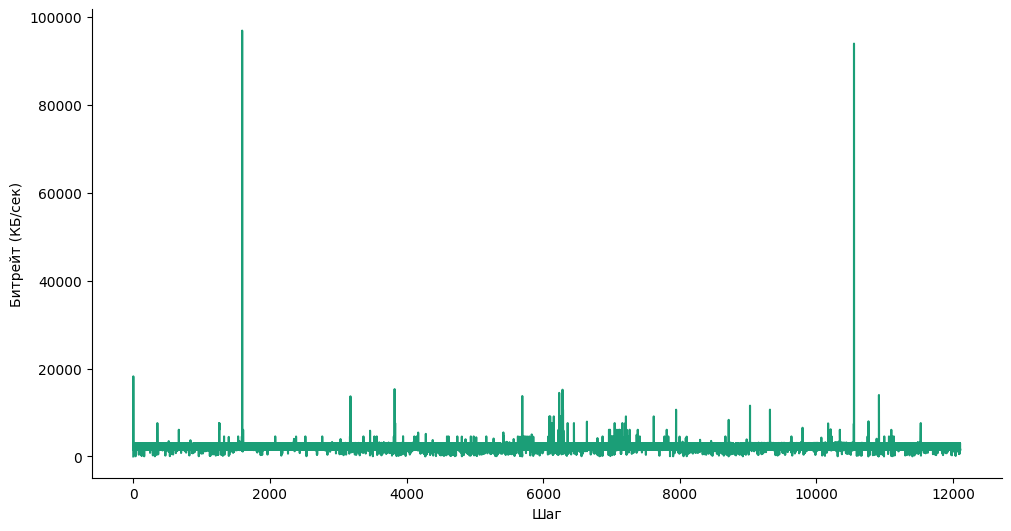

In [26]:
# @title timestamp vs value

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Шаг']
  ys = series['Битрейт (КБ/сек)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Шаг', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Шаг')
_ = plt.ylabel('Битрейт (КБ/сек)')

In [ ]:
#data.drop('timestamp', axis=1, inplace=True)

In [27]:
data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.183072,960,540,25.0,h264,2.792969,2024-04-12 22:38:23,12,4,22.633333
1,1,0.058239,960,540,25.0,h264,18225.000000,2024-04-12 22:38:23,12,4,22.633333
2,2,0.068052,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
3,3,0.045046,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
4,4,0.042582,960,540,25.0,h264,1518.750000,2024-04-12 22:38:23,12,4,22.633333
...,...,...,...,...,...,...,...,...,...,...,...
12101,12101,0.070591,960,540,25.0,h264,3037.500000,2024-04-12 22:50:12,12,4,22.833333
12102,12102,0.041576,960,540,25.0,h264,1518.750000,2024-04-12 22:50:12,12,4,22.833333
12103,12103,0.060667,960,540,25.0,h264,1519.964844,2024-04-12 22:50:12,12,4,22.833333
12104,12104,0.044035,960,540,25.0,h264,1518.750000,2024-04-12 22:50:12,12,4,22.833333


In [28]:
cont_vars = ['Ширина', 'Высота', 'Шаг','Время','Битрейт (КБ/сек)']
cat_vars = ['day', 'month','Кодек']

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoders = [LabelEncoder() for _ in cat_vars]
for col, enc in zip(cat_vars, label_encoders):
    data[col] = enc.fit_transform(data[col])

data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.183072,960,540,25.0,0,2.792969,2024-04-12 22:38:23,0,0,22.633333
1,1,0.058239,960,540,25.0,0,18225.000000,2024-04-12 22:38:23,0,0,22.633333
2,2,0.068052,960,540,25.0,0,1518.750000,2024-04-12 22:38:23,0,0,22.633333
3,3,0.045046,960,540,25.0,0,1518.750000,2024-04-12 22:38:23,0,0,22.633333
4,4,0.042582,960,540,25.0,0,1518.750000,2024-04-12 22:38:23,0,0,22.633333
...,...,...,...,...,...,...,...,...,...,...,...
12101,12101,0.070591,960,540,25.0,0,3037.500000,2024-04-12 22:50:12,0,0,22.833333
12102,12102,0.041576,960,540,25.0,0,1518.750000,2024-04-12 22:50:12,0,0,22.833333
12103,12103,0.060667,960,540,25.0,0,1519.964844,2024-04-12 22:50:12,0,0,22.833333
12104,12104,0.044035,960,540,25.0,0,1518.750000,2024-04-12 22:50:12,0,0,22.833333


In [30]:
test_ratio = 0.1

In [31]:
tr_data = data.iloc[: int(len(data) * (1 - test_ratio))]
tst_data = data.iloc[int(len(data) * (1 - test_ratio)) :]

In [32]:
scaler = preprocessing.StandardScaler().fit(tr_data[cont_vars])

In [33]:
tr_data_scaled = tr_data.copy()
tr_data_scaled[cont_vars] = scaler.transform(tr_data[cont_vars])
tst_data_scaled = tst_data.copy()
tst_data_scaled[cont_vars] = scaler.transform(tst_data[cont_vars])

In [34]:
tr_data, tr_data_scaled

(         Шаг     Время  Ширина  Высота  Частота кадров  Кодек  \
 0          0  1.183072     960     540            25.0      0   
 1          1  0.058239     960     540            25.0      0   
 2          2  0.068052     960     540            25.0      0   
 3          3  0.045046     960     540            25.0      0   
 4          4  0.042582     960     540            25.0      0   
 ...      ...       ...     ...     ...             ...    ...   
 10890  10890  0.040033     960     540            25.0      0   
 10891  10891  0.062745     960     540            25.0      0   
 10892  10892  0.055402     960     540            25.0      0   
 10893  10893  0.040001     960     540            25.0      0   
 10894  10894  0.040004     960     540            25.0      0   
 
        Битрейт (КБ/сек)         Время видео  day  month   hour_min  
 0              2.792969 2024-04-12 22:38:23    0      0  22.633333  
 1          18225.000000 2024-04-12 22:38:23    0      0  22.63333

In [35]:
tr_data_scaled.to_csv('train.csv', index=False)
tst_data_scaled.to_csv('test.csv', index=False)

# АРХИТЕКТУРА ВАЕ

In [45]:
class TSDataset(Dataset):
    def __init__(self, split, cont_vars=None, cat_vars=None, lbl_as_feat=True):
        """
        split: 'train' if we want to get data from the training examples, 'test' for
        test examples, or 'both' to merge the training and test sets and return samples
        from either.
        cont_vars: List of continuous variables to return as features. If None, returns
        all continuous variables available.
        cat_vars: Same as above, but for categorical variables.
        lbl_as_feat: Set to True when training a VAE -- the labels (temperature values)
        will be included as another dimension of the data. Set to False when training
        a model to predict temperatures.
        """
        super().__init__()
        assert split in ['train', 'test', 'both']
        self.lbl_as_feat = lbl_as_feat
        if split == 'train':
            self.df = pd.read_csv(datasets_root/'train.csv')
        elif split == 'test':
            self.df = pd.read_csv(datasets_root/'test.csv')
        else:
            df1 = pd.read_csv(datasets_root/'train.csv')
            df2 = pd.read_csv(datasets_root/'test.csv')
            self.df = pd.concat((df1, df2), ignore_index=True)

        # Select continuous variables to use
        if cont_vars:
            self.cont_vars = cont_vars
            # If we want to use 'value' as a feature, ensure it is returned
            if self.lbl_as_feat:
                try:
                    assert 'Битрейт (КБ/сек)' in self.cont_vars
                except AssertionError:
                    self.cont_vars.insert(0, 'Битрейт (КБ/сек)')
            # If not, ensure it not returned as a feature
            else:
                try:
                    assert 'Битрейт (КБ/сек)' not in self.cont_vars
                except AssertionError:
                    self.cont_vars.remove('Битрейт (КБ/сек)')

        else:  # if no list provided, use all available
            self.cont_vars = ['Ширина', 'Высота', 'Шаг', 'Время', 'Битрейт (КБ/сек)']

        # Select categorical variables to use
        if cat_vars:
            self.cat_vars = cat_vars
        else:  # if no list provided, use all available
            self.cat_vars = ['day', 'month', 'Кодек']

        # Finally, make two Numpy arrays for continuous and categorical
        # variables, respectively:
        if self.lbl_as_feat:
            self.cont = self.df[self.cont_vars].copy().to_numpy(dtype=np.float32)
        else:
            self.cont = self.df[self.cont_vars].copy().to_numpy(dtype=np.float32)
            self.lbl = self.df['Битрейт (КБ/сек)'].copy().to_numpy(dtype=np.float32)
        self.cat = self.df[self.cat_vars].copy().to_numpy(dtype=np.int64)

    def __getitem__(self, idx):
        if self.lbl_as_feat:  # for VAE training
            return torch.tensor(self.cont[idx]), torch.tensor(self.cat[idx])
        else:  # for supervised prediction
            return torch.tensor(self.cont[idx]), torch.tensor(self.cat[idx]), torch.tensor(self.lbl[idx])

    def __len__(self):
        return self.df.shape[0]

In [7]:
ds = TSDataset(split='both', cont_vars=['Ширина', 'Высота', 'Шаг', 'Время', 'Битрейт (КБ/сек)'], cat_vars=['day', 'month', 'Кодек'], lbl_as_feat=True)
print(len(ds))
it = iter(ds)
for _ in range(10):
    print(next(it))

NameError: name 'datasets_root' is not defined

In [42]:
class Layer(nn.Module):
    '''
    A single fully connected layer with optional batch normalisation and activation.
    '''
    def __init__(self, in_dim, out_dim, bn = True):
        super().__init__()
        layers = [nn.Linear(in_dim, out_dim)]
        if bn: layers.append(nn.BatchNorm1d(out_dim))
        layers.append(nn.LeakyReLU(0.1, inplace=True))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)


class Encoder(nn.Module):
    '''
    The encoder part of our VAE. Takes a data sample and returns the mean and the log-variance of the
    latent vector's distribution.
    '''
    def __init__(self, **hparams):
        super().__init__()
        self.hparams = Namespace(**hparams)
        self.embeds = nn.ModuleList([
            nn.Embedding(n_cats, emb_size) for (n_cats, emb_size) in self.hparams.embedding_sizes
        ])
        # The input to the first layer is the concatenation of all embedding vectors and continuous
        # values
        in_dim = sum(emb.embedding_dim for emb in self.embeds) + len(self.hparams.cont_vars)
        layer_dims = [in_dim] + [int(s) for s in self.hparams.layer_sizes.split(',')]
        bn = self.hparams.batch_norm
        self.layers = nn.Sequential(
            *[Layer(layer_dims[i], layer_dims[i + 1], bn) for i in range(len(layer_dims) - 1)],
        )
        self.mu = nn.Linear(layer_dims[-1], self.hparams.latent_dim)
        self.logvar = nn.Linear(layer_dims[-1], self.hparams.latent_dim)

    def forward(self, x_cont, x_cat):
        x_embed = [e(x_cat[:, i]) for i, e in enumerate(self.embeds)]
        x_embed = torch.cat(x_embed, dim=1)
        x = torch.cat((x_embed, x_cont), dim=1)
        h = self.layers(x)
        mu_ = self.mu(h)
        logvar_ = self.logvar(h)
        return mu_, logvar_, x  # we return the concatenated input vector for use in loss fn


class Decoder(nn.Module):
    '''
    The decoder part of our VAE. Takes a latent vector (sampled from the distribution learned by the
    encoder) and converts it back to a reconstructed data sample.
    '''
    def __init__(self, **hparams):
        super().__init__()
        self.hparams = Namespace(**hparams)
        hidden_dims = [self.hparams.latent_dim] + [int(s) for s in reversed(self.hparams.layer_sizes.split(','))]
        out_dim = sum(emb_size for _, emb_size in self.hparams.embedding_sizes) + len(self.hparams.cont_vars)
        bn = self.hparams.batch_norm
        self.layers = nn.Sequential(
            *[Layer(hidden_dims[i], hidden_dims[i + 1], bn) for i in range(len(hidden_dims) - 1)],
        )
        self.reconstructed = nn.Linear(hidden_dims[-1], out_dim)

    def forward(self, z):
        h = self.layers(z)
        recon = self.reconstructed(h)
        return recon

In [47]:
class VAE(pl.LightningModule):
    def __init__(self, **hparams):
        super().__init__()
        self.save_hyperparameters()
        self.encoder = Encoder(**hparams)
        self.decoder = Decoder(**hparams)

    def reparameterize(self, mu, logvar):
        '''
        The reparameterisation trick allows us to backpropagate through the encoder.
        '''
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std) * self.hparams.stdev
            return eps * std + mu
        else:
            return mu

    def forward(self, batch):
        x_cont, x_cat = batch
        assert x_cat.dtype == torch.int64
        mu, logvar, x = self.encoder(x_cont, x_cat)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar, x

    def loss_function(self, obs, recon, mu, logvar):
        recon_loss = F.smooth_l1_loss(recon, obs, reduction='mean')
        kld = -0.5 * torch.mean(1 + logvar - mu ** 2 - logvar.exp())
        return recon_loss, kld

    def training_step(self, batch, batch_idx):
        recon, mu, logvar, x = self.forward(batch)
        # The loss function compares the concatenated input vector including
        # embeddings to the reconstructed vector
        recon_loss, kld = self.loss_function(x, recon, mu, logvar)
        loss = recon_loss + self.hparams.kld_beta * kld

        self.log('total_loss', loss.mean(dim=0), on_step=True, prog_bar=True,
                 logger=True)
        self.log('recon_loss', recon_loss.mean(dim=0), on_step=True, prog_bar=True,
                 logger=True)
        self.log('kld', kld.mean(dim=0), on_step=True, prog_bar=True, logger=True)
        return loss

    def test_step(self, batch, batch_idx):
        recon, mu, logvar, x = self.forward(batch)
        recon_loss, kld = self.loss_function(x, recon, mu, logvar)
        loss = recon_loss + self.hparams.kld_beta * kld
        self.log('test_loss', loss)
        return loss

    def configure_optimizers(self):
        opt = torch.optim.AdamW(self.parameters(), lr=self.hparams.lr,
                                weight_decay=self.hparams.weight_decay,
                                eps=1e-4)
        sch = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            opt, T_0=25, T_mult=1, eta_min=1e-9, last_epoch=-1)
        return [opt], [sch]

    def train_dataloader(self):
        dataset = TSDataset('train', cont_vars=self.hparams.cont_vars,
            cat_vars = self.hparams.cat_vars, lbl_as_feat=True
        )
        return DataLoader(dataset, batch_size=self.hparams.batch_size, num_workers=2,
            pin_memory=True, persistent_workers=True, shuffle=True
        )

    def test_dataloader(self):
        dataset = TSDataset('test', cont_vars=self.hparams.cont_vars,
            cat_vars=self.hparams.cat_vars, lbl_as_feat=True
        )
        return DataLoader(dataset, batch_size=self.hparams.batch_size, num_workers=2,
            pin_memory=True, persistent_workers=True
        )

# готовим данные

In [49]:
cont_features = ['Ширина', 'Высота', 'Шаг', 'Время', 'Битрейт (КБ/сек)']
cat_features = ['day', 'month', 'Кодек']  # Remember that we removed `day` and `month`

embed_cats = [len(tr_data_scaled[c].unique()) for c in cat_features]

hparams = OrderedDict(
    run='embsz16_latsz16_bsz128_lay64-128-256-128-64_ep100_cosineWR_v1',
    cont_vars = cont_features,
    cat_vars = cat_features,
    embedding_sizes = [(embed_cats[i], 16) for i in range(len(embed_cats))],
    latent_dim = 16,
    layer_sizes = '64,128,256,128,64',
    batch_norm = True,
    stdev = 0.1,
    kld_beta = 0.05,
    lr = 0.001,
    weight_decay = 1e-5,
    batch_size = 128,
    epochs = 100,
)

In [50]:
hparams

OrderedDict([('run',
              'embsz16_latsz16_bsz128_lay64-128-256-128-64_ep100_cosineWR_v1'),
             ('cont_vars',
              ['Ширина', 'Высота', 'Шаг', 'Время', 'Битрейт (КБ/сек)']),
             ('cat_vars', ['day', 'month', 'Кодек']),
             ('embedding_sizes', [(1, 16), (1, 16), (1, 16)]),
             ('latent_dim', 16),
             ('layer_sizes', '64,128,256,128,64'),
             ('batch_norm', True),
             ('stdev', 0.1),
             ('kld_beta', 0.05),
             ('lr', 0.001),
             ('weight_decay', 1e-05),
             ('batch_size', 128),
             ('epochs', 100)])

# обучаем модель ВАЕ

In [48]:
model = VAE(**hparams)
#logger = WandbLogger(name=hparams['run'], project='VAE_Anomaly', version=hparams['run'],
#     save_dir='contest'
#)
ckpt_callback = pl.callbacks.ModelCheckpoint(dirpath='.', filename='vae_weights')
# Replace argument logger by None if you don't have a WandB account (and don't want to create one)
trainer = pl.Trainer(accelerator='cpu', devices=1, strategy='auto',
                     max_epochs=hparams['epochs'], benchmark=True,
                     callbacks=[ckpt_callback], gradient_clip_val=10., enable_model_summary=True,
)
# tuning = trainer.tune(model)
# print(f"Initial learning rate set at {tuning['lr_find'].suggestion()}")

NameError: name 'hparams' is not defined

In [52]:
trainer.fit(model)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /content exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 89.4 K
1 | decoder | Decoder | 88.3 K
------------------------------------
177 K     Trainable params
0         Non-trainable params
177 K     Total params
0.711     Total estimated model params size (MB)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [53]:
trainer.test(model)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.001848202315159142    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.001848202315159142}]

In [51]:
dataset = TSDataset('train', cont_vars=hparams['cont_vars'],
                    cat_vars=hparams['cat_vars'],
                    lbl_as_feat=True)

In [55]:
device = torch.device('cpu:0')  # или 'cpu', в зависимости от вашей конфигурации
#device = torch.device('cuda:0')  # или 'cpu', в зависимости от вашей конфигурации

In [57]:
trained_model = VAE.load_from_checkpoint('/content/vae_weights.ckpt')
#trained_model.cuda()
trained_model.freeze()

#pred = model(x.cuda())

losses = []
# run predictions for the training set examples
for i in range(len(dataset)):
    x_cont, x_cat = dataset[i]
    x_cont.unsqueeze_(0)
    x_cat.unsqueeze_(0)
#   recon, mu, logvar, x = trained_model.forward((x_cont.cuda(), x_cat.cuda())) #для передачи в cuda
    recon, mu, logvar, x = trained_model.forward((x_cont, x_cat))
    recon_loss, kld = trained_model.loss_function(x, recon, mu, logvar)
    losses.append(recon_loss + trained_model.hparams.kld_beta * kld)

data_with_losses = dataset.df
data_with_losses['loss'] = torch.asarray(losses)
data_with_losses.sort_values('Шаг', inplace=True)
data_with_losses.head()

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min,loss
0,-1.731892,26.659242,0.0,0.0,25.0,0,-1.400995,2024-04-12 22:38:23,0,0,22.633333,0.254692
1,-1.731574,-0.009968,0.0,0.0,25.0,0,10.089233,2024-04-12 22:38:23,0,0,22.633333,0.016246
2,-1.731256,0.222689,0.0,0.0,25.0,0,-0.445090,2024-04-12 22:38:23,0,0,22.633333,0.001152
3,-1.730938,-0.322764,0.0,0.0,25.0,0,-0.445090,2024-04-12 22:38:23,0,0,22.633333,0.000812
4,-1.730620,-0.381186,0.0,0.0,25.0,0,-0.445090,2024-04-12 22:38:23,0,0,22.633333,0.000820


#смотрим результаты детектора аномалий

In [58]:
mean, sigma = data_with_losses['loss'].mean(), data_with_losses['loss'].std()
mean, sigma

(0.001073501, 0.028315406)

In [92]:
quant = 0.997
thresh = data_with_losses['loss'].quantile(quant)  # threshold for anomaly (quantile).
thresh

0.005850109590217428

In [93]:
data_with_losses['anomaly'] = data_with_losses['loss'] > thresh
print(data_with_losses.head())

        Шаг      Время  Ширина  Высота  Частота кадров  Кодек  \
0 -1.731892  26.659242     0.0     0.0            25.0      0   
1 -1.731574  -0.009968     0.0     0.0            25.0      0   
2 -1.731256   0.222689     0.0     0.0            25.0      0   
3 -1.730938  -0.322764     0.0     0.0            25.0      0   
4 -1.730620  -0.381186     0.0     0.0            25.0      0   

   Битрейт (КБ/сек)          Время видео  day  month   hour_min      loss  \
0         -1.400995  2024-04-12 22:38:23    0      0  22.633333  0.254692   
1         10.089233  2024-04-12 22:38:23    0      0  22.633333  0.016246   
2         -0.445090  2024-04-12 22:38:23    0      0  22.633333  0.001152   
3         -0.445090  2024-04-12 22:38:23    0      0  22.633333  0.000812   
4         -0.445090  2024-04-12 22:38:23    0      0  22.633333  0.000820   

   anomaly  
0     True  
1     True  
2    False  
3    False  
4    False  


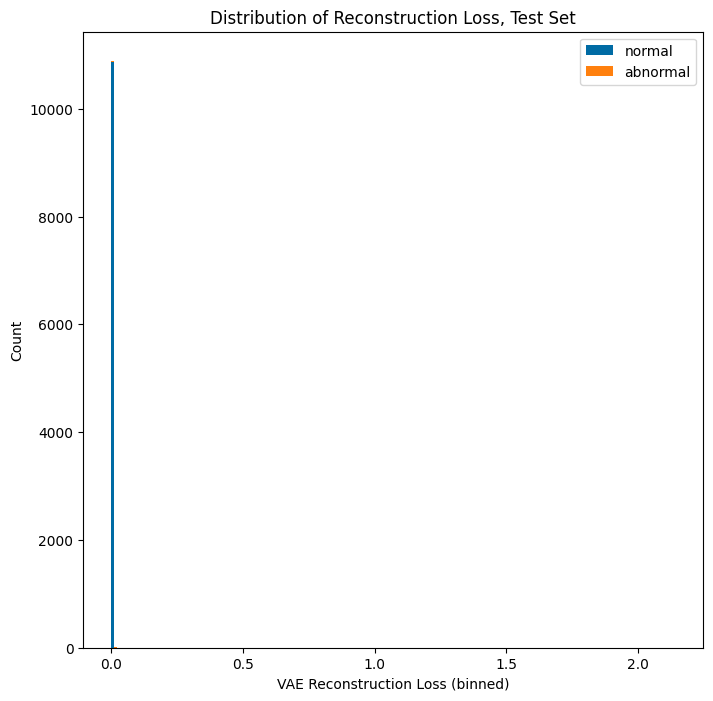

In [94]:
plt.figure(figsize=(8, 8))
anomalies_loss = data_with_losses.loc[data_with_losses['anomaly'], 'loss']
normals_loss   = data_with_losses.loc[~data_with_losses['anomaly'], 'loss']
plt.hist([normals_loss, anomalies_loss], bins=200, stacked=True, label=['normal', 'abnormal'])
plt.title("Distribution of Reconstruction Loss, Test Set")
plt.xlabel("VAE Reconstruction Loss (binned)")
plt.ylabel("Count")
plt.legend();

In [95]:
data_with_losses_unscaled = data_with_losses.copy()
data_with_losses_unscaled[cont_vars] = scaler.inverse_transform(data_with_losses[cont_vars])
for enc, var in zip(label_encoders, cat_vars):
    data_with_losses_unscaled[var] = enc.inverse_transform(data_with_losses[var])
data_with_losses_unscaled = pd.DataFrame(data_with_losses_unscaled, columns=data_with_losses.columns)
#data_with_losses_unscaled['Шаг'] = pd.to_datetime(data_with_losses_unscaled['Шаг'] * 1e11, unit='ns')

print(data_with_losses_unscaled.head())

   Шаг     Время  Ширина  Высота  Частота кадров Кодек  Битрейт (КБ/сек)  \
0  0.0  1.183072   960.0   540.0            25.0  h264          2.792969   
1  1.0  0.058239   960.0   540.0            25.0  h264      18225.000000   
2  2.0  0.068052   960.0   540.0            25.0  h264       1518.750000   
3  3.0  0.045046   960.0   540.0            25.0  h264       1518.750000   
4  4.0  0.042582   960.0   540.0            25.0  h264       1518.750000   

           Время видео  day  month   hour_min      loss  anomaly  
0  2024-04-12 22:38:23   12      4  22.633333  0.254692     True  
1  2024-04-12 22:38:23   12      4  22.633333  0.016246     True  
2  2024-04-12 22:38:23   12      4  22.633333  0.001152    False  
3  2024-04-12 22:38:23   12      4  22.633333  0.000812    False  
4  2024-04-12 22:38:23   12      4  22.633333  0.000820    False  


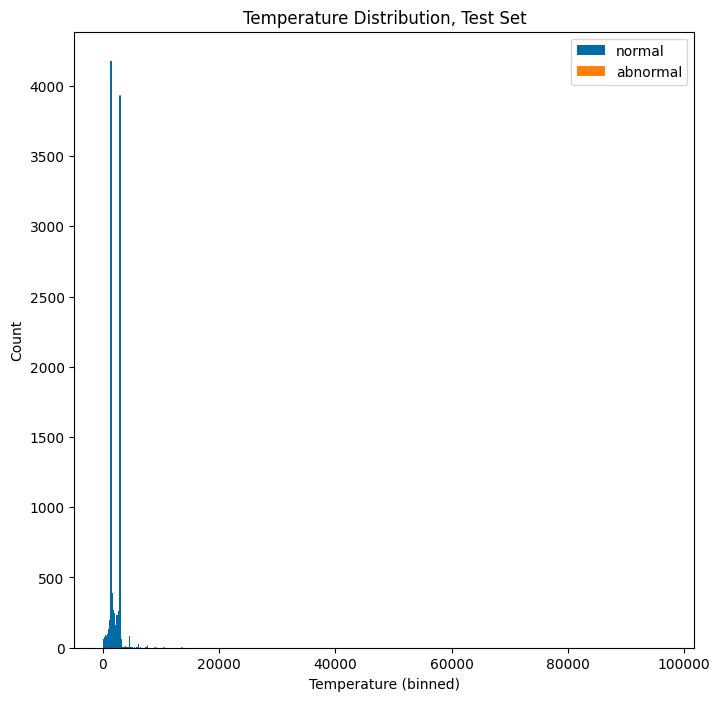

In [96]:
anomalies_value = data_with_losses_unscaled.loc[data_with_losses_unscaled['anomaly'], ['loss','Битрейт (КБ/сек)']]
normals_value = data_with_losses_unscaled.loc[~data_with_losses_unscaled['anomaly'], ['loss','Битрейт (КБ/сек)']]
plt.figure(figsize=(8,8))
plt.hist([normals_value['Битрейт (КБ/сек)'], anomalies_value['Битрейт (КБ/сек)']], bins=500, stacked=True, label=['normal', 'abnormal'])
plt.title("Temperature Distribution, Test Set")
plt.xlabel("Temperature (binned)")
plt.ylabel("Count")
plt.legend()

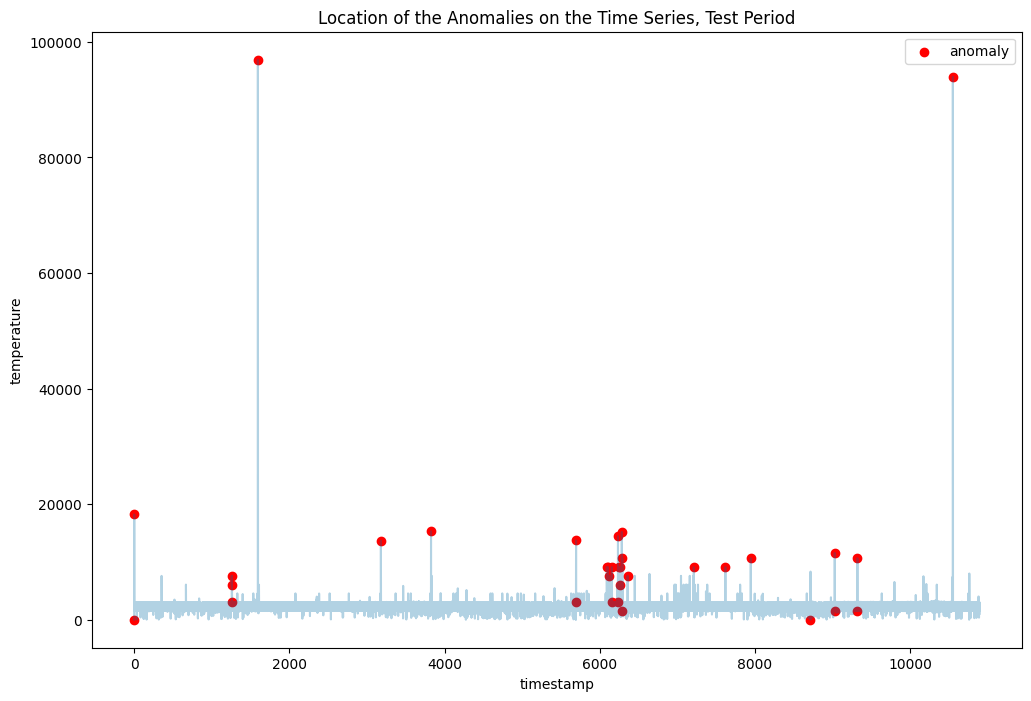

In [97]:
anomalies_ts = data_with_losses_unscaled.loc[data_with_losses_unscaled['anomaly'], ('Шаг', 'Битрейт (КБ/сек)')]
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data_with_losses_unscaled['Шаг'], data_with_losses_unscaled['Битрейт (КБ/сек)'], alpha=0.3)
ax.scatter(anomalies_ts['Шаг'], anomalies_ts['Битрейт (КБ/сек)'], color='red', label='anomaly')
plt.legend()
plt.xlabel("timestamp")
plt.ylabel("temperature")
plt.title("Location of the Anomalies on the Time Series, Test Period");

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем 't' во временную дельту и добавляем его к 'timestamp' для получения фактического времени записи данных.
data_with_losses_unscaled['timestamp'] = data_with_losses_unscaled['timestamp'] + pd.to_timedelta(data_with_losses_unscaled['t'], unit='s')
s=1
# Рассчитываем скользящее среднее за 20 минут для столбца 'value'
rolling_mean = data_with_losses_unscaled['value'].rolling(2*s+1).mean()

# Создаем график
fig, ax = plt.subplots(figsize=(12, 8))

# График исходных данных с прозрачностью 0.3
ax.plot(data_with_losses_unscaled['timestamp'], data_with_losses_unscaled['value'], alpha=0.3, label='Original Data')

# График аномалий
anomalies_ts = data_with_losses_unscaled.loc[data_with_losses_unscaled['anomaly'], ('timestamp', 'value')]
ax.scatter(anomalies_ts['timestamp'], anomalies_ts['value'], color='red', label='Anomaly')

# График скользящего среднего
#ax.plot(data_with_losses_unscaled['timestamp'], rolling_mean, color='green', label='Rolling Mean ()')

# Сдвигаем rolling_mean на 20 минут вперед
rolling_mean_forward = rolling_mean.shift(-20)
# График скользящего среднего, предсказывающий следующие значения на основе предыдущих 20 минут данных
ax.plot(data_with_losses_unscaled['timestamp'], rolling_mean_forward, color='orange', label='Rolling Mean Forward (3 values before and after)')

# Добавляем легенду и метки осей
plt.legend()
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.title("Location of the Anomalies on the Time Series, Test Period")
plt.show()


KeyError: 'timestamp'

In [ ]:
print(data_with_losses_unscaled['timestamp'])


0      1970-03-10 04:39:55.633430
1      1970-03-10 04:41:36.633430
2      1970-03-10 04:43:17.633430
3      1970-03-10 04:44:58.633430
4      1970-03-10 04:46:39.633430
                  ...            
7995   1970-03-19 12:58:10.633430
7996   1970-03-19 12:59:51.633430
7997   1970-03-19 13:01:32.633430
7998   1970-03-19 13:03:13.633430
7999   1970-03-19 13:04:54.633430
Name: timestamp, Length: 8000, dtype: datetime64[ns]


In [ ]:
data_with_losses_unscaled.head()

,value,day,month,hour_min,day_of_week,holiday,t,loss,anomaly,timestamp
0,313.803731,7,4,16.2,6,0,58336.59043,0.001410,False,1970-03-10 04:39:55.633430
1,325.837894,7,4,16.2,6,0,58337.59043,0.001113,False,1970-03-10 04:41:36.633430
2,341.648436,7,4,16.2,6,0,58338.59043,0.000903,False,1970-03-10 04:43:17.633430
3,344.685966,7,4,16.2,6,0,58339.59043,0.000956,False,1970-03-10 04:44:58.633430
4,346.468405,7,4,16.2,6,0,58340.59043,0.000990,False,1970-03-10 04:46:39.633430


In [ ]:
df = pd.read_csv('/content/data_test_VAE.csv')
min_value = df['value'].min()
print("Минимальное значение в столбце 'value':", min_value)

#Подготовка рандомного датасеста и прогонка его по модели

In [ ]:
#device = torch.device('cuda:0')  # или 'cpu', в зависимости от вашей конфигурации

In [8]:
datatestfile_path = Path('/content/officework_fortest960_540.csv')
datasets_root = Path('/content')

In [9]:
raw_dt = pd.read_csv(datatestfile_path)
raw_dt.head(20)

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео
0,0,1.209684,960,540,25.0,h264,0.140625,2024-04-13 07:55:02
1,1,0.040130,960,540,25.0,h264,9111.820312,2024-04-13 07:55:02
2,2,0.040583,960,540,25.0,h264,7594.429688,2024-04-13 07:55:02
3,3,0.078300,960,540,25.0,h264,3037.500000,2024-04-13 07:55:02
4,4,0.040001,960,540,25.0,h264,1694.344727,2024-04-13 07:55:02
5,5,0.045239,960,540,25.0,h264,1343.155273,2024-04-13 07:55:02
6,6,0.077356,960,540,25.0,h264,3037.500000,2024-04-13 07:55:02
7,7,0.078214,960,540,25.0,h264,3037.500000,2024-04-13 07:55:02
8,8,0.077442,960,540,25.0,h264,3037.500000,2024-04-13 07:55:02
9,9,0.042712,960,540,25.0,h264,1518.750000,2024-04-13 07:55:02


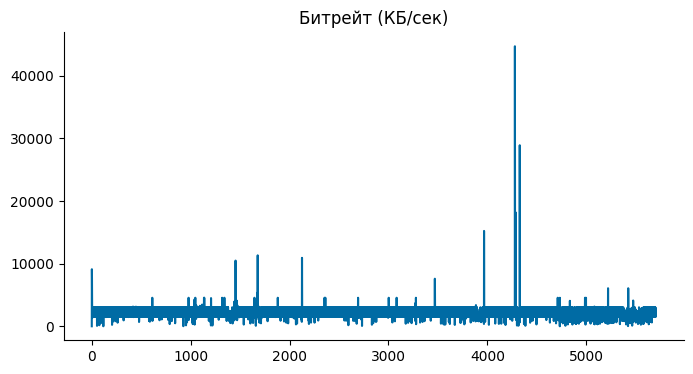

In [12]:
# @title value

from matplotlib import pyplot as plt
raw_dt['Битрейт (КБ/сек)'].plot(kind='line', figsize=(8, 4), title='Битрейт (КБ/сек)')
plt.gca().spines[['top', 'right']].set_visible(False)

#прогнозирование

##экспоненциальное сглаживание



In [13]:
from statsmodels.tsa.api import ExponentialSmoothing

In [14]:
season_type = 'multiplicative'
seas_period_ = 45

In [16]:
datatestfile_path = Path('/content/officework_fortest960_540.csv')
raw_dt = pd.read_csv(datatestfile_path)

endog_data = raw_dt['Битрейт (КБ/сек)']

fit1 = ExponentialSmoothing(endog_data, seasonal_periods=seas_period_, trend='additive', seasonal=season_type, damped=True).fit()


<ipython-input-16-9552d0a97a65>:6: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(endog_data, seasonal_periods=seas_period_, trend='additive', seasonal=season_type, damped=True).fit()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
raw_dt

,timestamp,value
0,2024-04-10 09:05:10.794425,327.411526
1,2024-04-10 09:05:11.794425,340.458627
2,2024-04-10 09:05:12.794425,346.179441
3,2024-04-10 09:05:13.794425,318.668016
4,2024-04-10 09:05:14.794425,333.104446
...,...,...
995,2024-04-10 09:21:45.794425,348.941346
996,2024-04-10 09:21:46.794425,315.327305
997,2024-04-10 09:21:47.794425,325.719483
998,2024-04-10 09:21:48.794425,325.606263


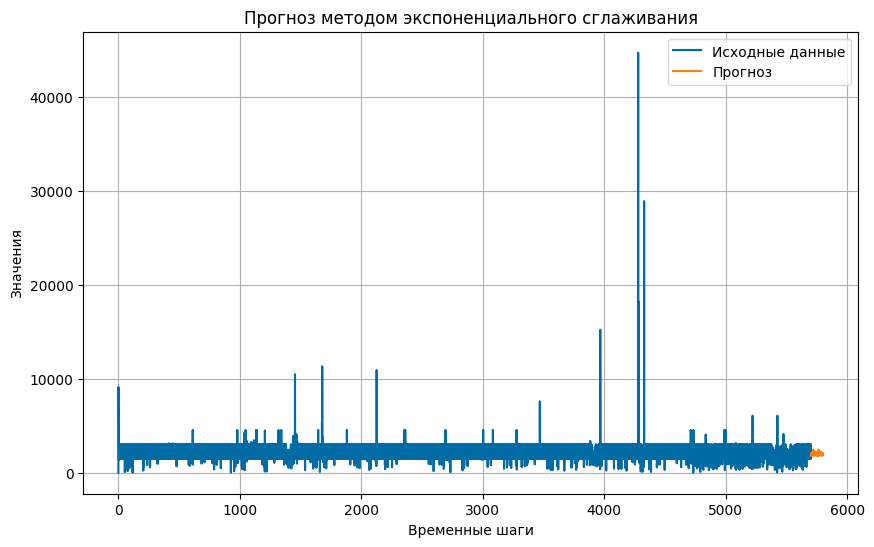

In [17]:
# Получение спрогнозированных значений
forecast_values = fit1.forecast(steps=100)  # Прогноз на 10 шагов вперед

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(endog_data, label='Исходные данные')
plt.plot(forecast_values.index, forecast_values, label='Прогноз')
plt.xlabel('Временные шаги')
plt.ylabel('Значения')
plt.title('Прогноз методом экспоненциального сглаживания')
plt.legend()
plt.grid(True)
plt.show()

##АРИМА прогнозирование

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Загрузите временной ряд
datatestfile_path = Path('/content/data_test_VAE_300_350_1000.csv')
df = pd.read_csv(datatestfile_path, index_col='timestamp', parse_dates=True)

# Разделите данные на обучающий и тестовый наборы
train_data = df.iloc[:-50]  # Последние 50 значений временного ряда будут использоваться для тестирования
test_data = df.iloc[-50:]

# Выберите модель ARIMA и обучите ее
model = ARIMA(train_data['value'], order=(1, 1, 1))  # Пример порядка модели ARIMA
fit = model.fit()

# Сделайте прогнозы
forecast = fit.forecast(steps=50)

# Оцените производительность модели
mse = mean_squared_error(test_data['value'], forecast)
print(f'Mean Squared Error: {mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 381.10322518985976


In [ ]:
datatestfile_path = Path('/content/data_test_VAE_300_350_1000.csv')
df = pd.read_csv(datatestfile_path, index_col='timestamp', parse_dates=True)

# Выберите столбец 'value' в качестве зависимой переменной
endog_data = df['value']

# Примените модель ARIMA
model = ARIMA(endog_data, order=(0, 1, 0))  # Пример порядка модели ARIMA (p, d, q)
fit = model.fit()

# Спрогнозируйте следующие 50 временных шагов
forecast = fit.forecast(steps=50)

# Выведите прогноз
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


2024-04-10 09:21:50.794425    339.037547
2024-04-10 09:21:51.794425    339.037547
2024-04-10 09:21:52.794425    339.037547
2024-04-10 09:21:53.794425    339.037547
2024-04-10 09:21:54.794425    339.037547
2024-04-10 09:21:55.794425    339.037547
2024-04-10 09:21:56.794425    339.037547
2024-04-10 09:21:57.794425    339.037547
2024-04-10 09:21:58.794425    339.037547
2024-04-10 09:21:59.794425    339.037547
2024-04-10 09:22:00.794425    339.037547
2024-04-10 09:22:01.794425    339.037547
2024-04-10 09:22:02.794425    339.037547
2024-04-10 09:22:03.794425    339.037547
2024-04-10 09:22:04.794425    339.037547
2024-04-10 09:22:05.794425    339.037547
2024-04-10 09:22:06.794425    339.037547
2024-04-10 09:22:07.794425    339.037547
2024-04-10 09:22:08.794425    339.037547
2024-04-10 09:22:09.794425    339.037547
2024-04-10 09:22:10.794425    339.037547
2024-04-10 09:22:11.794425    339.037547
2024-04-10 09:22:12.794425    339.037547
2024-04-10 09:22:13.794425    339.037547
2024-04-10 09:22

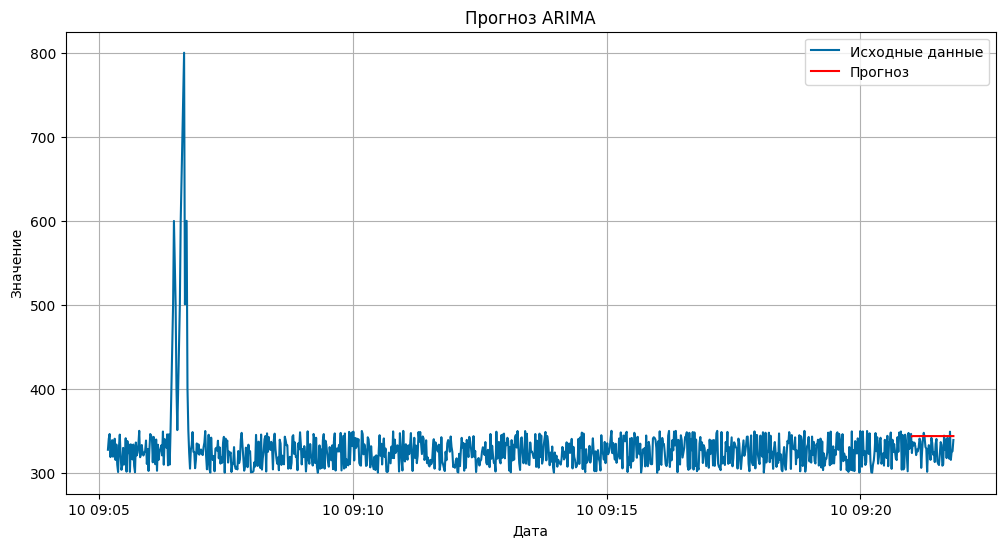

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(endog_data, label='Исходные данные')
plt.plot(forecast.index, forecast, color='red', linestyle='-', label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Прогноз ARIMA')
plt.legend()
plt.grid(True)
plt.show()

##Прогноза XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Загрузите временной ряд
datatestfile_path = Path('/content/data_test_VAE_300_350_1000.csv')
df = pd.read_csv(datatestfile_path, index_col='timestamp', parse_dates=True)

# Создайте набор признаков
# В этом примере временной ряд просто используется в качестве единственного признака
X = df[['value']]
y = df['value']


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Обучите модель XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Сделайте прогнозы
y_pred = model.predict(X_test)
#MAPE
mape_value = mape(y_test, y_pred)
print(f'MAPE: {mape_value}')
# Оцените производительность модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


MAPE: 0.13662472002870393
Mean Squared Error: 18.149891279369907


In [ ]:
df

,value
timestamp,
2024-04-10 09:05:10.794425,327.411526
2024-04-10 09:05:11.794425,340.458627
2024-04-10 09:05:12.794425,346.179441
2024-04-10 09:05:13.794425,318.668016
2024-04-10 09:05:14.794425,333.104446
...,...
2024-04-10 09:21:45.794425,348.941346
2024-04-10 09:21:46.794425,315.327305
2024-04-10 09:21:47.794425,325.719483


In [ ]:
import numpy as np

last_50_values = df['value'].values[-50:]
X_future = np.array([last_50_values]).T

# Прогнозируйте с помощью модели
y_future_pred = model.predict(X_future)

# Выведите прогнозы
print(y_future_pred)


[323.48172 336.30063 332.47467 335.78348 331.74844 321.02533 327.64642
 325.40106 330.65125 340.75317 337.31503 305.89096 325.27234 339.9182
 347.60336 342.23978 330.65125 328.87695 301.0601  326.3497  332.919
 326.06512 315.28146 341.54587 335.78348 321.7998  324.62247 312.75198
 334.06696 340.3857  313.90152 310.70996 309.1552  323.54373 336.55054
 332.919   308.4839  310.06717 344.28024 327.398   339.68408 317.50323
 341.67026 334.2343  316.85034 348.84152 315.28146 325.8602  325.49933
 338.94247]


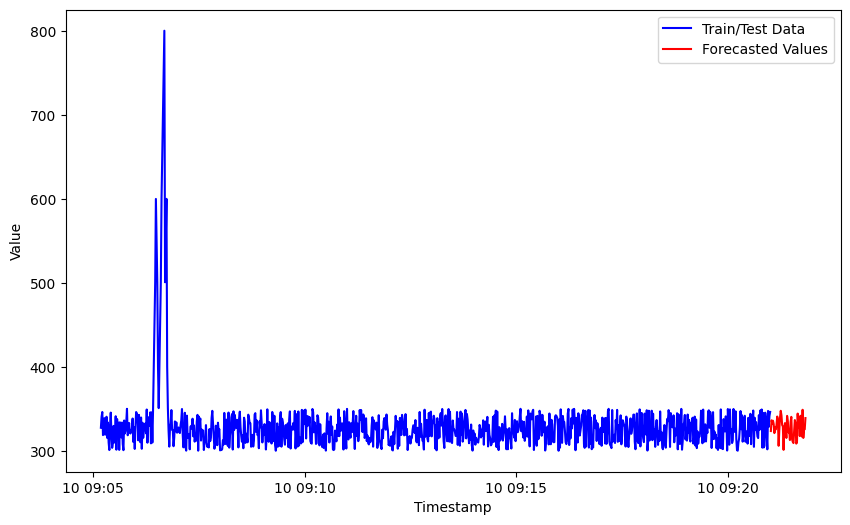

In [ ]:
import matplotlib.pyplot as plt

# Создаем массивы для данных обучающего и тестового наборов
train_test_values = df['value'][:-50]  # Данные из обучающего и тестового набора
forecast_values = y_future_pred  # Прогнозные значения

# Создаем массивы для временных меток
previous_timestamps = df.index[:-50]  # Для обучающего и тестового набора
forecast_timestamps = pd.date_range(start=df.index[-50], periods=50, freq='s')  # Для прогнозных значений (50 шагов)

# Создаем новый график
plt.figure(figsize=(10, 6))

# Строим график с данными из обучающего и тестового наборов
plt.plot(previous_timestamps, train_test_values, label='Train/Test Data', color='blue')

# Продолжаем график с прогнозными значениями
plt.plot(forecast_timestamps, forecast_values, label='Forecasted Values', linestyle='-', color='red')

# Добавляем подписи к осям и легенду
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Показываем график
plt.show()


## Catboost прогноз

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor
import numpy as np

# Обучите модель CatBoost
model_catboost = CatBoostRegressor()
model_catboost.fit(X_train, y_train, verbose=100)

# Сделайте прогнозы
y_pred_catboost = model_catboost.predict(X_test)
#MAPE
mape_value_catboost = mape(y_test, y_pred_catboost)
print(f'CatBoost MAPE: {mape_value_catboost}')
# Оцените производительность модели
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
print(f'CatBoost Mean Squared Error: {mse_catboost}')


Learning rate set to 0.040267
0:	learn: 35.1005304	total: 754us	remaining: 754ms
100:	learn: 6.6166494	total: 60ms	remaining: 534ms
200:	learn: 5.9616167	total: 120ms	remaining: 475ms
300:	learn: 5.9388232	total: 178ms	remaining: 413ms
400:	learn: 5.9347969	total: 245ms	remaining: 366ms
500:	learn: 5.9334729	total: 304ms	remaining: 303ms
600:	learn: 5.9329034	total: 364ms	remaining: 242ms
700:	learn: 5.9325699	total: 437ms	remaining: 186ms
800:	learn: 5.9323531	total: 499ms	remaining: 124ms
900:	learn: 5.9322005	total: 560ms	remaining: 61.6ms
999:	learn: 5.9320838	total: 619ms	remaining: 0us
CatBoost MAPE: 0.10139249955076668
CatBoost Mean Squared Error: 11.28815845698952


ValueError: x and y must have same first dimension, but have shapes (50,) and (100,)

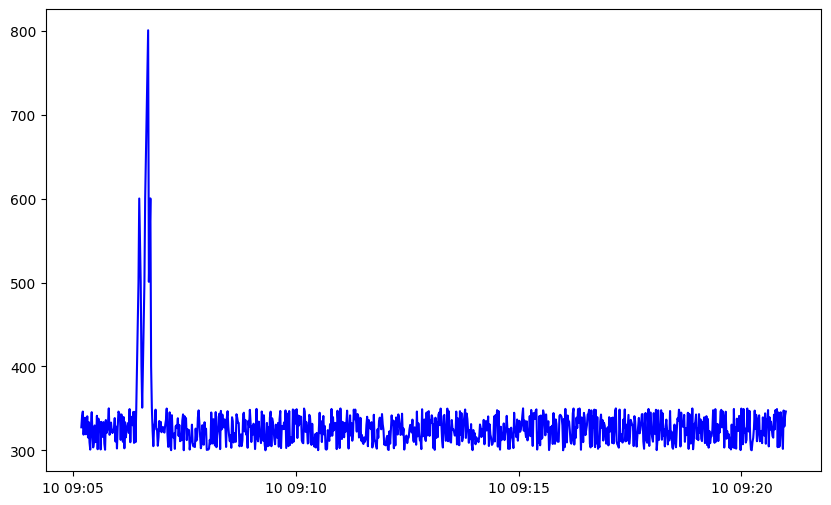

In [ ]:
# Создаем массивы для данных обучающего и тестового наборов
train_test_values = df['value'][:-50]  # Данные из обучающего и тестового набора
forecast_values = y_future_pred  # Прогнозные значения

# Создаем массивы для временных меток
previous_timestamps = df.index[:-50]  # Для обучающего и тестового набора
forecast_timestamps = pd.date_range(start=df.index[-50], periods=50, freq='s')  # Для прогнозных значений (50 шагов)

# Создаем новый график
plt.figure(figsize=(10, 6))

# Строим график с данными из обучающего и тестового наборов
plt.plot(previous_timestamps, train_test_values, label='Train/Test Data', color='blue')

# Продолжаем график с прогнозными значениями
plt.plot(forecast_timestamps, forecast_values, label='Forecasted Values', linestyle='-', color='red')

# Добавляем подписи к осям и легенду
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()

# Показываем график
plt.show()


#**Возвращаемся к анализу аномалий на тестовой дате, но уже используем прогнозы по битрейту на обучающих данных**

In [33]:
raw_dt

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео
0,0,1.209684,960,540,25.0,h264,0.140625,2024-04-13 07:55:02
1,1,0.040130,960,540,25.0,h264,9111.820312,2024-04-13 07:55:02
2,2,0.040583,960,540,25.0,h264,7594.429688,2024-04-13 07:55:02
3,3,0.078300,960,540,25.0,h264,3037.500000,2024-04-13 07:55:02
4,4,0.040001,960,540,25.0,h264,1694.344727,2024-04-13 07:55:02
...,...,...,...,...,...,...,...,...
5696,5696,0.042001,960,540,25.0,h264,1518.750000,2024-04-13 08:00:26
5697,5697,0.077278,960,540,25.0,h264,3037.500000,2024-04-13 08:00:26
5698,5698,0.042690,960,540,25.0,h264,1518.750000,2024-04-13 08:00:26
5699,5699,0.077227,960,540,25.0,h264,3038.077148,2024-04-13 08:00:26


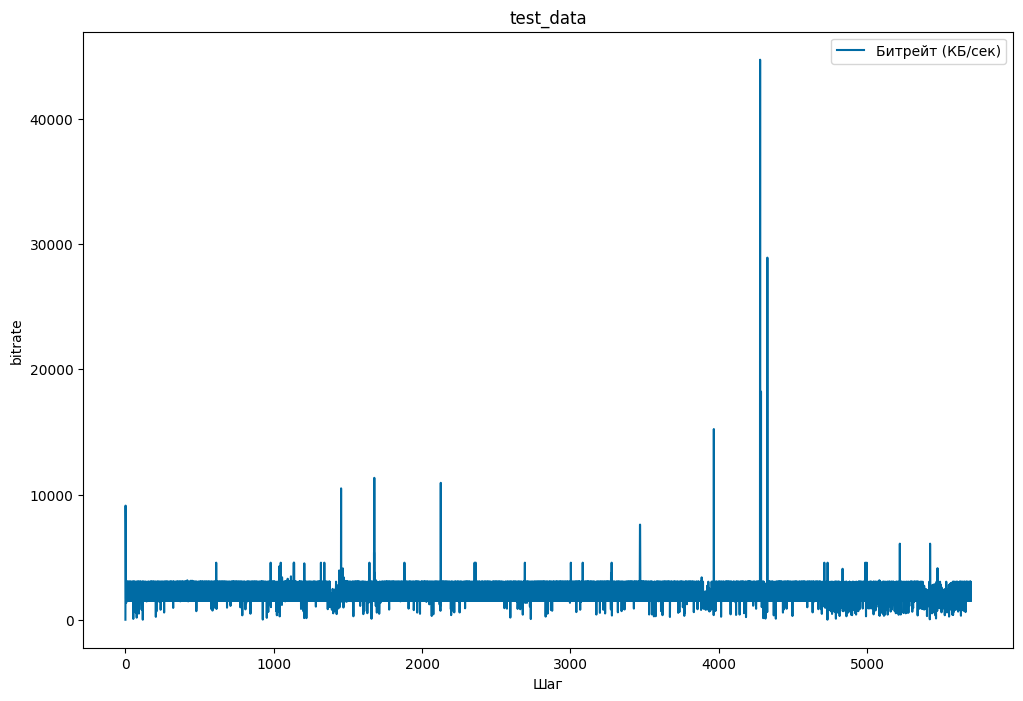

In [34]:
test_data = raw_dt.copy()
test_data.plot(x='Шаг', y='Битрейт (КБ/сек)', figsize=(12, 8))
plt.ylabel("bitrate")
plt.title('test_data');

In [35]:
test_data['Время видео'] = pd.to_datetime(test_data['Время видео'])

# Now you can use the .dt accessor
test_data['day'] = test_data['Время видео'].dt.day
test_data['month'] = test_data['Время видео'].dt.month
test_data['hour_min'] = test_data['Время видео'].dt.hour + test_data['Время видео'].dt.minute / 60

In [36]:
test_data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.209684,960,540,25.0,h264,0.140625,2024-04-13 07:55:02,13,4,7.916667
1,1,0.040130,960,540,25.0,h264,9111.820312,2024-04-13 07:55:02,13,4,7.916667
2,2,0.040583,960,540,25.0,h264,7594.429688,2024-04-13 07:55:02,13,4,7.916667
3,3,0.078300,960,540,25.0,h264,3037.500000,2024-04-13 07:55:02,13,4,7.916667
4,4,0.040001,960,540,25.0,h264,1694.344727,2024-04-13 07:55:02,13,4,7.916667
...,...,...,...,...,...,...,...,...,...,...,...
5696,5696,0.042001,960,540,25.0,h264,1518.750000,2024-04-13 08:00:26,13,4,8.000000
5697,5697,0.077278,960,540,25.0,h264,3037.500000,2024-04-13 08:00:26,13,4,8.000000
5698,5698,0.042690,960,540,25.0,h264,1518.750000,2024-04-13 08:00:26,13,4,8.000000
5699,5699,0.077227,960,540,25.0,h264,3038.077148,2024-04-13 08:00:26,13,4,8.000000


58336.59043


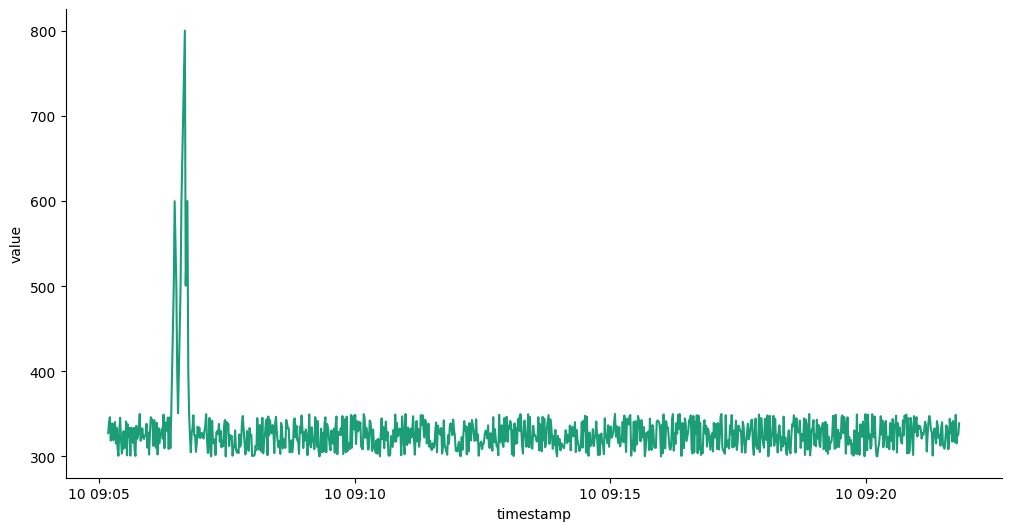

In [ ]:
from datetime import datetime
# Пример времени
timestamp = '2024-04-07 16:12:16.590430'

# Преобразование времени в формат datetime
dt_object = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')

# Получение количества секунд с начала суток
seconds_since_midnight = (dt_object - dt_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()

print(seconds_since_midnight)

import pandas as pd

# Преобразование строки времени в количество секунд с начала суток
test_data['t'] = test_data['timestamp'].dt.hour * 3600 + test_data['timestamp'].dt.minute * 60 + test_data['timestamp'].dt.second + test_data['timestamp'].dt.microsecond / 1e6

test_data.head(20)

# @title timestamp vs value

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_data.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

In [37]:
cont_vars = ['Ширина', 'Высота', 'Шаг','Время','Битрейт (КБ/сек)']
cat_vars = ['day', 'month','Кодек']

from sklearn.preprocessing import LabelEncoder

label_encoders = [LabelEncoder() for _ in cat_vars]
for col, enc in zip(cat_vars, label_encoders):
    test_data[col] = enc.fit_transform(test_data[col])

test_data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.209684,960,540,25.0,0,0.140625,2024-04-13 07:55:02,0,0,7.916667
1,1,0.040130,960,540,25.0,0,9111.820312,2024-04-13 07:55:02,0,0,7.916667
2,2,0.040583,960,540,25.0,0,7594.429688,2024-04-13 07:55:02,0,0,7.916667
3,3,0.078300,960,540,25.0,0,3037.500000,2024-04-13 07:55:02,0,0,7.916667
4,4,0.040001,960,540,25.0,0,1694.344727,2024-04-13 07:55:02,0,0,7.916667
...,...,...,...,...,...,...,...,...,...,...,...
5696,5696,0.042001,960,540,25.0,0,1518.750000,2024-04-13 08:00:26,0,0,8.000000
5697,5697,0.077278,960,540,25.0,0,3037.500000,2024-04-13 08:00:26,0,0,8.000000
5698,5698,0.042690,960,540,25.0,0,1518.750000,2024-04-13 08:00:26,0,0,8.000000
5699,5699,0.077227,960,540,25.0,0,3038.077148,2024-04-13 08:00:26,0,0,8.000000


In [38]:
test_ratio = 0.001

tr_data = test_data.iloc[: int(len(test_data) * (1 - test_ratio))]
tst_data = test_data.iloc[int(len(test_data) * (1 - test_ratio)) :]
scaler = preprocessing.StandardScaler().fit(tr_data[cont_vars])

tr_data_scaled = tr_data.copy()
tr_data_scaled[cont_vars] = scaler.transform(tr_data[cont_vars])
tst_data_scaled = tst_data.copy()
tst_data_scaled[cont_vars] = scaler.transform(tst_data[cont_vars])

tr_data_scaled.to_csv('train.csv', index=False)
tst_data_scaled.to_csv('test.csv', index=False)

In [39]:
ds = TSDataset(split='both', cont_vars=['Ширина', 'Высота', 'Шаг', 'Время', 'Битрейт (КБ/сек)'], cat_vars=['day', 'month', 'Кодек'], lbl_as_feat=True)
print(len(ds))
it = iter(ds)
for _ in range(10):
    print(next(it))

5701
(tensor([ 0.0000,  0.0000, -1.7317, 37.7349, -1.9398]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7311, -0.5534,  6.2440]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7305, -0.5386,  4.8811]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7299,  0.6962,  0.7883]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7293, -0.5576, -0.4181]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7287, -0.3861, -0.7335]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7281,  0.6653,  0.7883]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7275,  0.6934,  0.7883]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7269,  0.6681,  0.7883]), tensor([0, 0, 0]))
(tensor([ 0.0000,  0.0000, -1.7263, -0.4689, -0.5758]), tensor([0, 0, 0]))


In [40]:
tr_data

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min
0,0,1.209684,960,540,25.0,0,0.140625,2024-04-13 07:55:02,0,0,7.916667
1,1,0.040130,960,540,25.0,0,9111.820312,2024-04-13 07:55:02,0,0,7.916667
2,2,0.040583,960,540,25.0,0,7594.429688,2024-04-13 07:55:02,0,0,7.916667
3,3,0.078300,960,540,25.0,0,3037.500000,2024-04-13 07:55:02,0,0,7.916667
4,4,0.040001,960,540,25.0,0,1694.344727,2024-04-13 07:55:02,0,0,7.916667
...,...,...,...,...,...,...,...,...,...,...,...
5690,5690,0.046265,960,540,25.0,0,1518.750000,2024-04-13 08:00:25,0,0,8.000000
5691,5691,0.061930,960,540,25.0,0,3036.921875,2024-04-13 08:00:25,0,0,8.000000
5692,5692,0.043147,960,540,25.0,0,1518.750000,2024-04-13 08:00:25,0,0,8.000000
5693,5693,0.047328,960,540,25.0,0,1518.750000,2024-04-13 08:00:25,0,0,8.000000


In [52]:
dataset = TSDataset('train', cont_vars=hparams['cont_vars'],
                    cat_vars=hparams['cat_vars'],
                    lbl_as_feat=True)

In [71]:
trained_model = VAE.load_from_checkpoint('/content/vae_weights.ckpt')
#trained_model.cuda()
trained_model.freeze()

#pred = model(x.cuda())

losses = []
# run predictions for the training set examples
for i in range(len(dataset)):
    x_cont, x_cat = dataset[i]
    x_cont.unsqueeze_(0)
    x_cat.unsqueeze_(0)
#    recon, mu, logvar, x = trained_model.forward((x_cont.cuda(), x_cat.cuda()))
    recon, mu, logvar, x = trained_model.forward((x_cont, x_cat))
    recon_loss, kld = trained_model.loss_function(x, recon, mu, logvar)
    losses.append(recon_loss + trained_model.hparams.kld_beta * kld)

data_with_losses_test = dataset.df
data_with_losses_test['loss'] = torch.asarray(losses)
data_with_losses_test.sort_values('Шаг', inplace=True)
data_with_losses_test.head()

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min,loss,anomaly
0,-1.731747,37.734924,0.0,0.0,25.0,0,-1.939772,2024-04-13 07:55:02,0,0,7.916667,0.581199,True
1,-1.731138,-0.553387,0.0,0.0,25.0,0,6.243996,2024-04-13 07:55:02,0,0,7.916667,0.011119,True
2,-1.730530,-0.538565,0.0,0.0,25.0,0,4.881133,2024-04-13 07:55:02,0,0,7.916667,0.006661,True
3,-1.729922,0.696192,0.0,0.0,25.0,0,0.788270,2024-04-13 07:55:02,0,0,7.916667,0.002108,False
4,-1.729314,-0.557610,0.0,0.0,25.0,0,-0.418101,2024-04-13 07:55:02,0,0,7.916667,0.001141,False


In [74]:
mean, sigma = data_with_losses_test['loss'].mean(), data_with_losses_test['loss'].std()
mean, sigma

(0.0015005759, 0.016266255)

In [81]:
quant = 0.995
thresh = data_with_losses_test['loss'].quantile(quant)  # threshold for anomaly (quantile).
thresh

0.0037748107709921746

In [82]:
data_with_losses_test['anomaly'] = data_with_losses_test['loss'] > thresh
print(data_with_losses_test.head())

        Шаг      Время  Ширина  Высота  Частота кадров  Кодек  \
0 -1.731747  37.734924     0.0     0.0            25.0      0   
1 -1.731138  -0.553387     0.0     0.0            25.0      0   
2 -1.730530  -0.538565     0.0     0.0            25.0      0   
3 -1.729922   0.696192     0.0     0.0            25.0      0   
4 -1.729314  -0.557610     0.0     0.0            25.0      0   

   Битрейт (КБ/сек)          Время видео  day  month  hour_min      loss  \
0         -1.939772  2024-04-13 07:55:02    0      0  7.916667  0.581199   
1          6.243996  2024-04-13 07:55:02    0      0  7.916667  0.011119   
2          4.881133  2024-04-13 07:55:02    0      0  7.916667  0.006661   
3          0.788270  2024-04-13 07:55:02    0      0  7.916667  0.002108   
4         -0.418101  2024-04-13 07:55:02    0      0  7.916667  0.001141   

   anomaly  
0     True  
1     True  
2     True  
3    False  
4    False  


In [83]:
data_with_losses_unscaled_test = data_with_losses_test.copy()
data_with_losses_unscaled_test[cont_vars] = scaler.inverse_transform(data_with_losses_test[cont_vars])
for enc, var in zip(label_encoders, cat_vars):
    data_with_losses_unscaled_test[var] = enc.inverse_transform(data_with_losses_test[var])
data_with_losses_unscaled_test = pd.DataFrame(data_with_losses_unscaled_test, columns=data_with_losses_test.columns)
data_with_losses_unscaled_test['Шаг'] = pd.to_datetime(data_with_losses_unscaled_test['Шаг'] * 1e11, unit='ns')

print(data_with_losses_unscaled_test.head())

                  Шаг     Время  Ширина  Высота  Частота кадров Кодек  \
0 1970-01-01 00:00:00  1.209684   960.0   540.0            25.0  h264   
1 1970-01-01 00:01:40  0.040130   960.0   540.0            25.0  h264   
2 1970-01-01 00:03:20  0.040583   960.0   540.0            25.0  h264   
3 1970-01-01 00:05:00  0.078300   960.0   540.0            25.0  h264   
4 1970-01-01 00:06:40  0.040001   960.0   540.0            25.0  h264   

   Битрейт (КБ/сек)          Время видео  day  month  hour_min      loss  \
0          0.140625  2024-04-13 07:55:02   13      4  7.916667  0.581199   
1       9111.820312  2024-04-13 07:55:02   13      4  7.916667  0.011119   
2       7594.429688  2024-04-13 07:55:02   13      4  7.916667  0.006661   
3       3037.500000  2024-04-13 07:55:02   13      4  7.916667  0.002108   
4       1694.344727  2024-04-13 07:55:02   13      4  7.916667  0.001141   

   anomaly  
0     True  
1     True  
2     True  
3    False  
4    False  


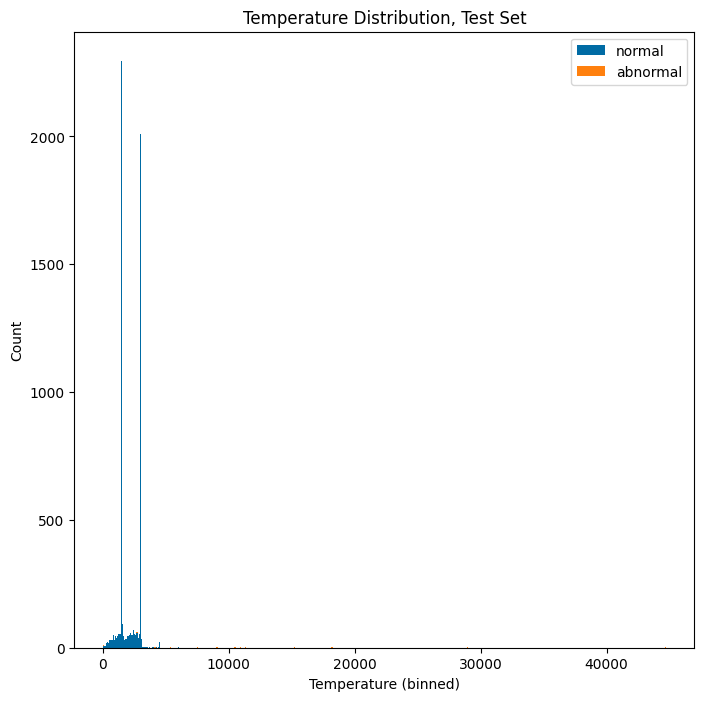

In [84]:
anomalies_value = data_with_losses_unscaled_test.loc[data_with_losses_unscaled_test['anomaly'], ['loss','Битрейт (КБ/сек)']]
normals_value = data_with_losses_unscaled_test.loc[~data_with_losses_unscaled_test['anomaly'], ['loss','Битрейт (КБ/сек)']]
plt.figure(figsize=(8,8))
plt.hist([normals_value['Битрейт (КБ/сек)'], anomalies_value['Битрейт (КБ/сек)']], bins=500, stacked=True, label=['normal', 'abnormal'])
plt.title("Temperature Distribution, Test Set")
plt.xlabel("Temperature (binned)")
plt.ylabel("Count")
plt.legend()

In [85]:
data_with_losses_unscaled_test

,Шаг,Время,Ширина,Высота,Частота кадров,Кодек,Битрейт (КБ/сек),Время видео,day,month,hour_min,loss,anomaly
0,1970-01-01 00:00:00,1.209684,960.0,540.0,25.0,h264,0.140625,2024-04-13 07:55:02,13,4,7.916667,0.581199,True
1,1970-01-01 00:01:40,0.040130,960.0,540.0,25.0,h264,9111.820312,2024-04-13 07:55:02,13,4,7.916667,0.011119,True
2,1970-01-01 00:03:20,0.040583,960.0,540.0,25.0,h264,7594.429688,2024-04-13 07:55:02,13,4,7.916667,0.006661,True
3,1970-01-01 00:05:00,0.078300,960.0,540.0,25.0,h264,3037.500000,2024-04-13 07:55:02,13,4,7.916667,0.002108,False
4,1970-01-01 00:06:40,0.040001,960.0,540.0,25.0,h264,1694.344727,2024-04-13 07:55:02,13,4,7.916667,0.001141,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,1970-01-07 14:03:20,0.046265,960.0,540.0,25.0,h264,1518.750000,2024-04-13 08:00:25,13,4,8.000000,0.001025,False
5691,1970-01-07 14:05:00,0.061930,960.0,540.0,25.0,h264,3036.921875,2024-04-13 08:00:25,13,4,8.000000,0.001935,False
5692,1970-01-07 14:06:40,0.043147,960.0,540.0,25.0,h264,1518.750000,2024-04-13 08:00:25,13,4,8.000000,0.001097,False
5693,1970-01-07 14:08:20,0.047328,960.0,540.0,25.0,h264,1518.750000,2024-04-13 08:00:25,13,4,8.000000,0.001021,False


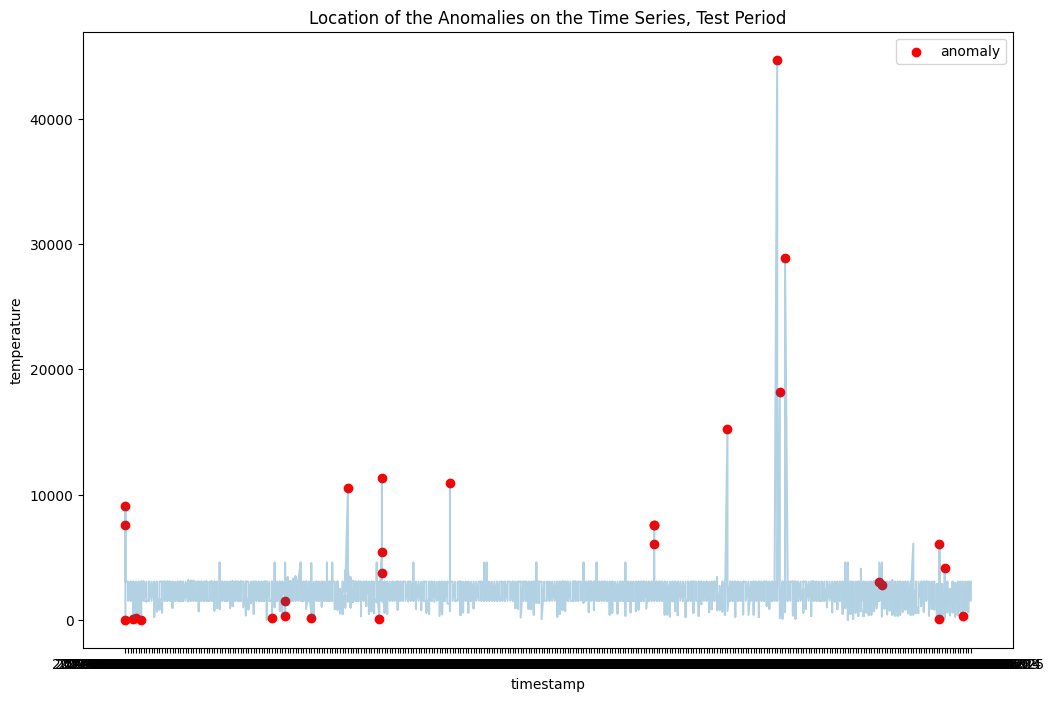

In [86]:
anomalies_ts = data_with_losses_unscaled_test.loc[data_with_losses_unscaled_test['anomaly'], ('Время видео', 'Битрейт (КБ/сек)')]
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data_with_losses_unscaled_test['Время видео'], data_with_losses_unscaled_test['Битрейт (КБ/сек)'], alpha=0.3)
ax.scatter(anomalies_ts['Время видео'], anomalies_ts['Битрейт (КБ/сек)'], color='red', label='anomaly')
plt.legend()
plt.xlabel("timestamp")
plt.ylabel("temperature")
plt.title("Location of the Anomalies on the Time Series, Test Period");

In [63]:
anomalies_ts

,Шаг,Битрейт (КБ/сек)
0,1970-01-01 00:00:00,0.140625
1,1970-01-01 00:01:40,9111.820312
2,1970-01-01 00:03:20,7594.429688
1040,1970-01-02 04:53:20,265.979492
1454,1970-01-02 16:23:20,10490.850586
1676,1970-01-02 22:33:20,5372.364258
1678,1970-01-02 22:36:40,11331.314453
2126,1970-01-03 11:03:20,10933.147461
3468,1970-01-05 00:20:00,6074.890625
3469,1970-01-05 00:21:40,7593.750000


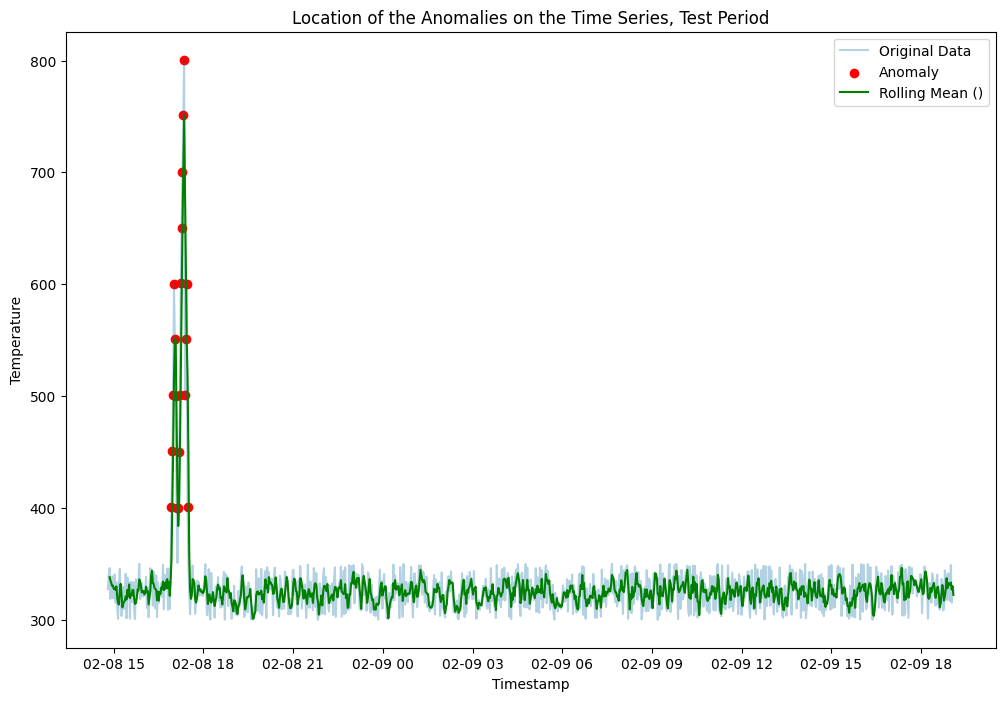

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем 't' во временную дельту и добавляем его к 'timestamp' для получения фактического времени записи данных.
data_with_losses_unscaled_test['timestamp'] = data_with_losses_unscaled_test['timestamp'] + pd.to_timedelta(data_with_losses_unscaled_test['t'], unit='s')
s=1
rolling_mean = data_with_losses_unscaled_test['Битрейт (КБ/сек)'].rolling(2*s+1).mean()

# Создаем график
fig, ax = plt.subplots(figsize=(12, 8))

# График исходных данных с прозрачностью 0.3
ax.plot(data_with_losses_unscaled_test['timestamp'], data_with_losses_unscaled_test['value'], alpha=0.3, label='Original Data')

# График аномалий
anomalies_ts = data_with_losses_unscaled_test.loc[data_with_losses_unscaled_test['anomaly'], ('timestamp', 'value')]
ax.scatter(anomalies_ts['timestamp'], anomalies_ts['value'], color='red', label='Anomaly')

# График скользящего среднего
ax.plot(data_with_losses_unscaled_test['timestamp'], rolling_mean, color='green', label='Rolling Mean ()')

# Добавляем легенду и метки осей
plt.legend()
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.title("Location of the Anomalies on the Time Series, Test Period")
plt.show()


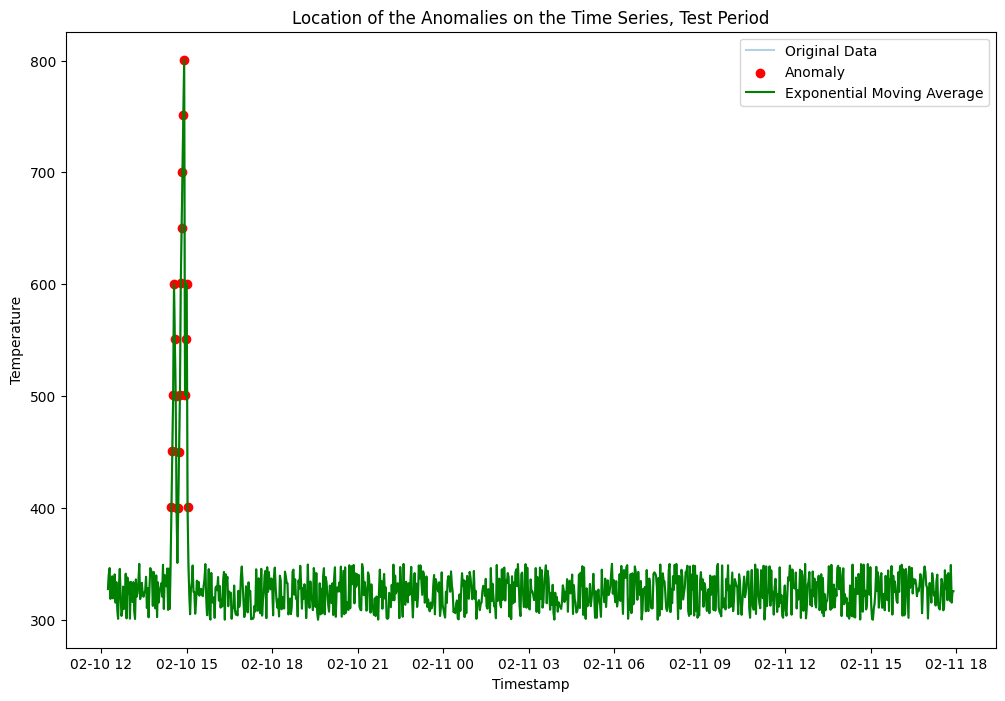

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем 't' во временную дельту и добавляем его к 'timestamp' для получения фактического времени записи данных.
data_with_losses_unscaled_test['timestamp'] = data_with_losses_unscaled_test['timestamp'] + pd.to_timedelta(data_with_losses_unscaled_test['t'], unit='s')
s = 0

# Вычисляем экспоненциальное скользящее среднее
ema = data_with_losses_unscaled_test['value'].ewm(span=2*s+1).mean()

# Создаем график
fig, ax = plt.subplots(figsize=(12, 8))

# График исходных данных с прозрачностью 0.3
ax.plot(data_with_losses_unscaled_test['timestamp'], data_with_losses_unscaled_test['value'], alpha=0.3, label='Original Data')

# График аномалий
anomalies_ts = data_with_losses_unscaled_test.loc[data_with_losses_unscaled_test['anomaly'], ('timestamp', 'value')]
ax.scatter(anomalies_ts['timestamp'], anomalies_ts['value'], color='red', label='Anomaly')

# График экспоненциального скользящего среднего
ax.plot(data_with_losses_unscaled_test['timestamp'], ema, color='green', label='Exponential Moving Average')

# Добавляем легенду и метки осей
plt.legend()
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.title("Location of the Anomalies on the Time Series, Test Period")
plt.show()
